In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [3]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 123947 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [15]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
df = pd.read_csv('/content/drive/MyDrive/cc_df.csv', nrows=10000)
df.head()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_day,age,gender_F,...,trans_month__Mar,trans_month__May,trans_month__Nov,trans_month__Oct,trans_month__Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
0,9.65,123.85,105051,825.04,1,9.265518,123.368859,13,60,0,...,0,0,0,0,0,0,0,1,0,0
1,9.65,123.85,105051,306.55,1,9.236416,124.337292,12,60,0,...,0,0,0,0,0,0,0,0,1,0
2,9.65,123.85,105051,346.48,1,9.460644,124.461767,12,60,0,...,0,0,0,0,0,0,0,0,0,1
3,9.65,123.85,105051,919.50,1,10.606020,123.930862,12,60,0,...,0,0,0,0,0,0,0,0,1,0
4,9.65,123.85,105051,1131.45,1,8.806183,123.719528,13,60,0,...,0,0,0,0,0,0,0,1,0,0


Would Recommend:      0
1   100
0  9900
Proportion Chance Criterion: 98.02%
1.25 * Proportion Chance Criterion: 122.52%


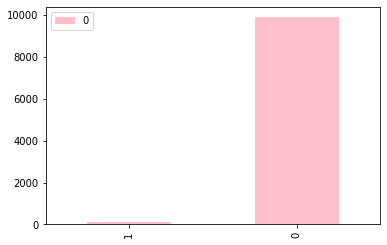

In [17]:
state_counts = Counter(df['is_fraud'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color='pink')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [18]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
(X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y, 
                                                      random_state=42, 
                                                      test_size=0.25) 

In [19]:
import pickle

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Gradient Boosting </span></div>

<b>Gradient boosting</b> works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one

<i>learning_rate</i>- how strongly each tree tries to correct the mistakes of the previous trees <br>

<u>Advantages</u>:

(1) Invariant to scaling of the data

<u>Disadvantages</u>:

(1) Might be longer to run than the decision tree <br>
(2) Sensitive to parameter choice <br>

(3) Does not work well on sparse data

In [14]:
import time 
start = time.time()
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 11) # try maxdepth from 1 to 10

    for depth in tqdm(maxdepth_settings):   
        tree = GradientBoostingClassifier(max_depth=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy
print("Runtime (in secs): ", time.time() - start)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

In [ ]:
# save the model to a pickle file
pickle_file_name = "tree5.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(tree, file)

In [ ]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    learningrate_settings = np.arange(0.1, 0.3, 0.05) # try learning_rate from 0.1 to 0.3

    for rate in tqdm(learningrate_settings):   
        gb_learningrate = GradientBoostingClassifier(learning_rate=rate)  # build the model
        gb_learningrate.fit(X_train, y_train)

        training_accuracy.append(gb_learningrate.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(gb_learningrate.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(learningrate_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(learningrate_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()
bestrate=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best learning_rate Parameters = %d" %bestrate )

In [ ]:
# save the model to a pickle file
pickle_file_name = "gb_learningrate.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(gb_learningrate, file)

In [21]:
import time 
start = time.time()
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    n_estimators_settings = range(1, 100) # try number of boosting stages from 1 to 100

    for stage in tqdm(n_estimators_settings):   
        gb_stage = GradientBoostingClassifier(n_estimators=stage)  # build the model
        gb_stage.fit(X_train, y_train)

        training_accuracy.append(gb_stage.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(gb_stage.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy
print("Runtime (in secs): ", time.time() - start)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Runtime (in secs):  2136.954006433487


Highest Average Test Set Achieved = 0.995644
Best n_estimators (Boosting Stage) Parameters = 8


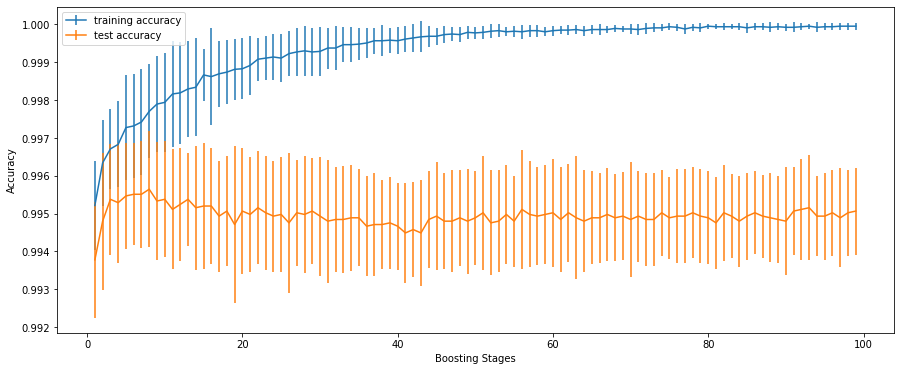

In [22]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(n_estimators_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(n_estimators_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Boosting Stages")
plt.legend()
beststage=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best n_estimators (Boosting Stage) Parameters = %d" %beststage )

In [24]:
# save the model to a pickle file
pickle_file_name = "gb_n_estimators.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(gb_stage, file)

## Multiple Parameters